# Task 2: Data Cleaning & Missing Value Handling

# 1️⃣ Setup Environment


In [3]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


# 2️⃣ Load Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Titanic Dataset
titanic = pd.read_csv("titanic.csv")

# Load Students Dataset
students = pd.read_csv("students.csv")

print("Titanic Shape:", titanic.shape)
print("Students Shape:", students.shape)


Titanic Shape: (891, 12)
Students Shape: (1000, 8)


# 3️⃣ Identify Missing Values

In [7]:
print("\nTitanic Missing Values:\n", titanic.isnull().sum())
print("\nStudents Missing Values:\n", students.isnull().sum())


Titanic Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Students Missing Values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


# 4️⃣ Visualize Missing Data (Bar Chart)

In [9]:
def plot_missing(data, title):
    missing = data.isnull().sum()
    missing = missing[missing > 0]

    if missing.empty:
        print(f"No missing values found in {title}")
    else:
        missing.plot(kind='bar')
        plt.title(title)
        plt.ylabel("Missing Count")
        plt.show()


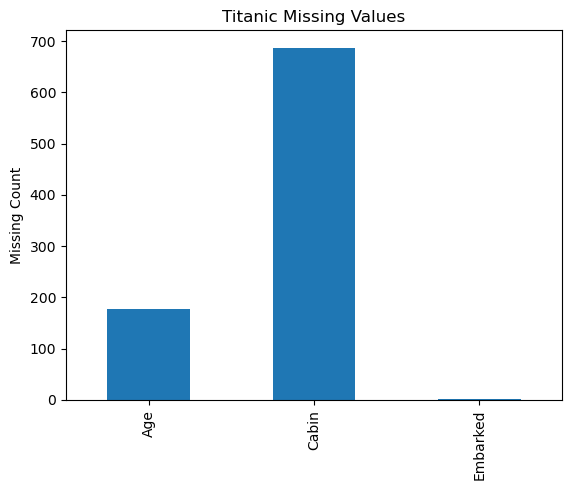

No missing values found in Students Missing Values


In [10]:
plot_missing(titanic, "Titanic Missing Values")
plot_missing(students, "Students Missing Values")

# 5️⃣ Handle Missing Values

In [12]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
titanic.drop(columns=['Cabin'], inplace=True, errors='ignore')

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

if 'Embarked' in titanic.columns:
    titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
    titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

titanic.drop(columns=['Name', 'Ticket'], inplace=True, errors='ignore')

titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Sex            891
Age              0
SibSp            0
Parch            0
Fare             0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [28]:
print(students.isnull().sum())

for col in students.columns:
    if students[col].isnull().sum() > 0:
        if students[col].dtype == 'object':
            students[col] = students[col].fillna(students[col].mode()[0])
        else:
            students[col] = students[col].fillna(students[col].mean())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


# 6️⃣ Validate After Cleaning

In [31]:
print("\nTitanic Missing After Cleaning:\n", titanic.isnull().sum())
print("\nStudents Missing After Cleaning:\n", students.isnull().sum())


Titanic Missing After Cleaning:
 PassengerId      0
Survived         0
Pclass           0
Sex            891
Age              0
SibSp            0
Parch            0
Fare             0
Embarked_Q       0
Embarked_S       0
dtype: int64

Students Missing After Cleaning:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


# 7️⃣ Compare Before vs After

In [33]:
print("Titanic Final Shape:", titanic.shape)
print("Students Final Shape:", students.shape)


Titanic Final Shape: (891, 10)
Students Final Shape: (1000, 8)


# Save Cleaned Datasets

In [37]:
titanic.to_csv("titanic_cleaned.csv", index=False)
students.to_csv("students_cleaned.csv", index=False)

print("Cleaned datasets saved successfully!")

Cleaned datasets saved successfully!
